In [1]:
# import necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# BigQuery settings
from google.cloud import bigquery
from google.cloud.bigquery import dbapi;
client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
import google.auth

credentials, your_project_id = google.auth.default( scopes=["https://www.googleapis.com/auth/cloud-platform"])
bqclient = bigquery.Client(credentials=credentials, project="som-nero-phi-jonc101",)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information abou

In [44]:
query = 'SELECT pat_enc_csn_id_coded, metric_id, metric_name, user_deid, user_role FROM `som-nero-phi-jonc101.noshad.cohort_AL_60`'
dataframe = bqclient.query(query).result().to_dataframe()

In [50]:
print(dataframe['user_role'].unique())
print(len(dataframe))

idx = ((dataframe['user_role']=='Registered Nurse') 
        | (dataframe['user_role']=='Emergency Resident')
       | (dataframe['user_role']=='Consulting Resident')
       | (dataframe['user_role']=='ED Tech')
        | (dataframe['user_role']=='Clinical Pharmacist'))

# print(len(dataframe[dataframe['user_role']=='Registered Nurse']))
dataframe_filtered_role = dataframe[idx]
#dataframe_filtered_role.head()
print(dataframe_filtered_role['user_role'].unique())
dataframe_filtered_role.shape

['Emergency Resident' None 'Registered Nurse' 'Co-Attending'
 'Primary Team' 'Student Nurse' 'Consulting Attending'
 'Consulting Service' 'Consulting Resident' 'ED Unit Secretary'
 'Trauma Attending' 'Primary Med Student' 'Nursing Assistant'
 'Physical Therapist' 'Respiratory Care Practitioner' 'Speech Therapist'
 'Occupational Therapist' 'ED Tech' 'Primary Care Physician'
 'Primary Physician Assistant' 'Case Manager' 'Nurse Practitioner'
 'Consulting Fellow' 'Social Worker' 'Primary Resident'
 'Physician Assistant' 'Additional Communicating Provider'
 'Primary Intern' 'Cross Cover Attending' 'Clinical Pharmacist'
 'Consulting Med Student' 'Care Coordinator' 'Consulting Intern'
 'Primary Sub-Intern' 'Transplant Pulmonologist' 'Medical Student'
 'Primary Fellow' 'Trauma Resident ' 'Transplant Pharmacist'
 'Cross Cover Resident' 'Spiritual Care'
 'Primary Advanced Practice Provider' 'Resident' 'Chief Resident'
 'Physical Therapist Assistant']
491376
['Emergency Resident' 'Registered Nurs

(260802, 5)

In [51]:
#dataframe.groupby(['user_deid']).size().unstack('metric_id', fill_value=0)
import pandas as pd
# Get one hot encoding of columns B
one_hot = pd.get_dummies(dataframe_filtered_role['metric_id'])
# Drop column B as it is now encoded
dataframe_filtered_role = dataframe_filtered_role.drop('metric_id',axis = 1)
# Join the encoded df
dataframe_filtered_role = dataframe_filtered_role.join(one_hot)

dataframe_filtered_role

,pat_enc_csn_id_coded,metric_name,user_deid,user_role,2000,2005,2006,2008,2009,2018,...,94060,94240,95020,95025,95030,95240,97000,97002,97003,97004
0,131026968666,SmartLink used,SS0066332,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,131026968666,Report with patient data viewed,SS0066332,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,131026968666,Report with patient data viewed,SS0066332,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,131026968666,SmartLink used,SS0066332,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,131026968666,Report with patient data viewed,SS0066332,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491356,131117089410,Report with patient data viewed,SS0040885,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491357,131117089410,In Basket message viewed,SS0040885,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491358,131117089410,Report with patient data viewed,SS0040885,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491359,131117089410,In Basket message viewed,SS0040885,Emergency Resident,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#dataframe_filter = dataframe.loc[:10000, :]
dataframe_filter = dataframe_filtered_role
dataframe_filter = dataframe_filter.drop(columns=['pat_enc_csn_id_coded', 'metric_name'])
group_df = dataframe_filter.groupby(['user_deid', 'user_role']).agg(lambda x: sum(x)).reset_index()
group_df = group_df.drop(columns=['user_deid'])
# group_df = dataframe_filter.groupby(['user_role']).agg(lambda x: sum(x)).reset_index()
# group_df.describe()
group_df

,user_role,2000,2005,2006,2008,2009,2018,2100,2133,2148,...,94060,94240,95020,95025,95030,95240,97000,97002,97003,97004
0,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1055,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1056,Registered Nurse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TSNE Visualization

In [56]:
import numpy as np
from sklearn.manifold import TSNE

Y = group_df['user_role'].to_numpy()
X = group_df.drop(columns='user_role').to_numpy().astype(np.float)
print(X[:2,:10])
print(X.shape)
print(Y.shape)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1058, 291)
(1058,)


(1058, 2)

### Plot

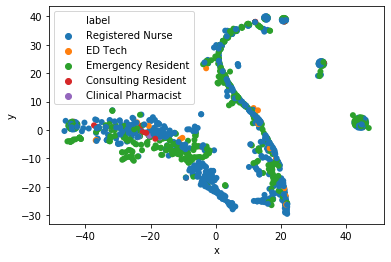

In [70]:
import seaborn as sns # pip3 install seaborn
plot_df = pd.DataFrame({'x': X_embedded[:,0].tolist(), 'y': X_embedded[:,1].tolist(), 'label': Y.tolist()})
plot_df.head()
sns.scatterplot(x='x', y='y', data=plot_df, hue='label', ec=None)